# Danish Ahmed 
Student ID : 0681817 

#### Q1- Provide a screen-shot of the Notebook 05ImageRendering where a diﬀerent clip limit has been used to render the image?
 

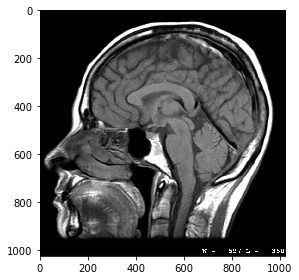

Original (8-bit encoding) the range is: 255


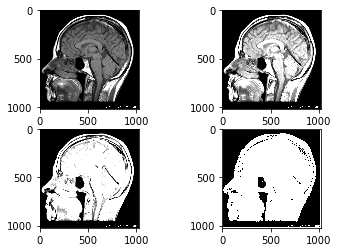

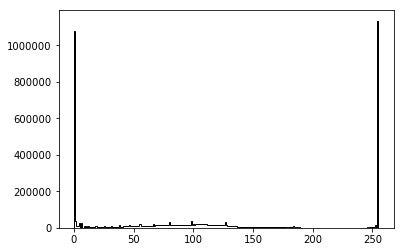

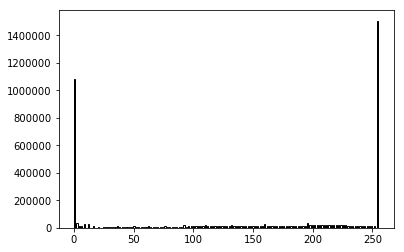

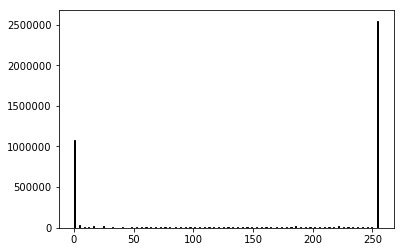

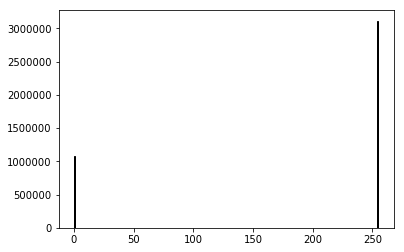

In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#the simplest way to open and display an image uses the novice module from skimage
brainpic = novice.open('braincomplete.png')
brainpic.show()

#however, we will use instead the matplotlib image modules to obtain arrays that we can manipulate
#the 8-bit data in the PNG will be converted to floating point data between 0 and 1 by imread
#unless you ask it to Flatten=True
brainpicarray = mpimg.imread('braincomplete.png','True') 
print('Original (8-bit encoding) the range is: '+str(np.max(brainpicarray))) #showing max value in the image
bp=plt.subplot(221)
plt.imshow(brainpicarray)

#this here only adjust the reduction in coded bits in the image
#we will use Jm where we reduce the encoding to only values between 0 and 200' Km up to 100 and finally Lm up to 50
Jm=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,7)-1)) #reducing encoding
Km=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,6)-1)) #reducing encoding
Lm=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,1)-1)) #reducing to 1 bit
plt.subplot(222)
plt.imshow(Jm)
plt.subplot(223)
plt.imshow(Km)
plt.subplot(224)
plt.imshow(Lm)

plt.figure()
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Jm.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Km.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Lm.ravel(), bins=256, histtype='step', color='black')

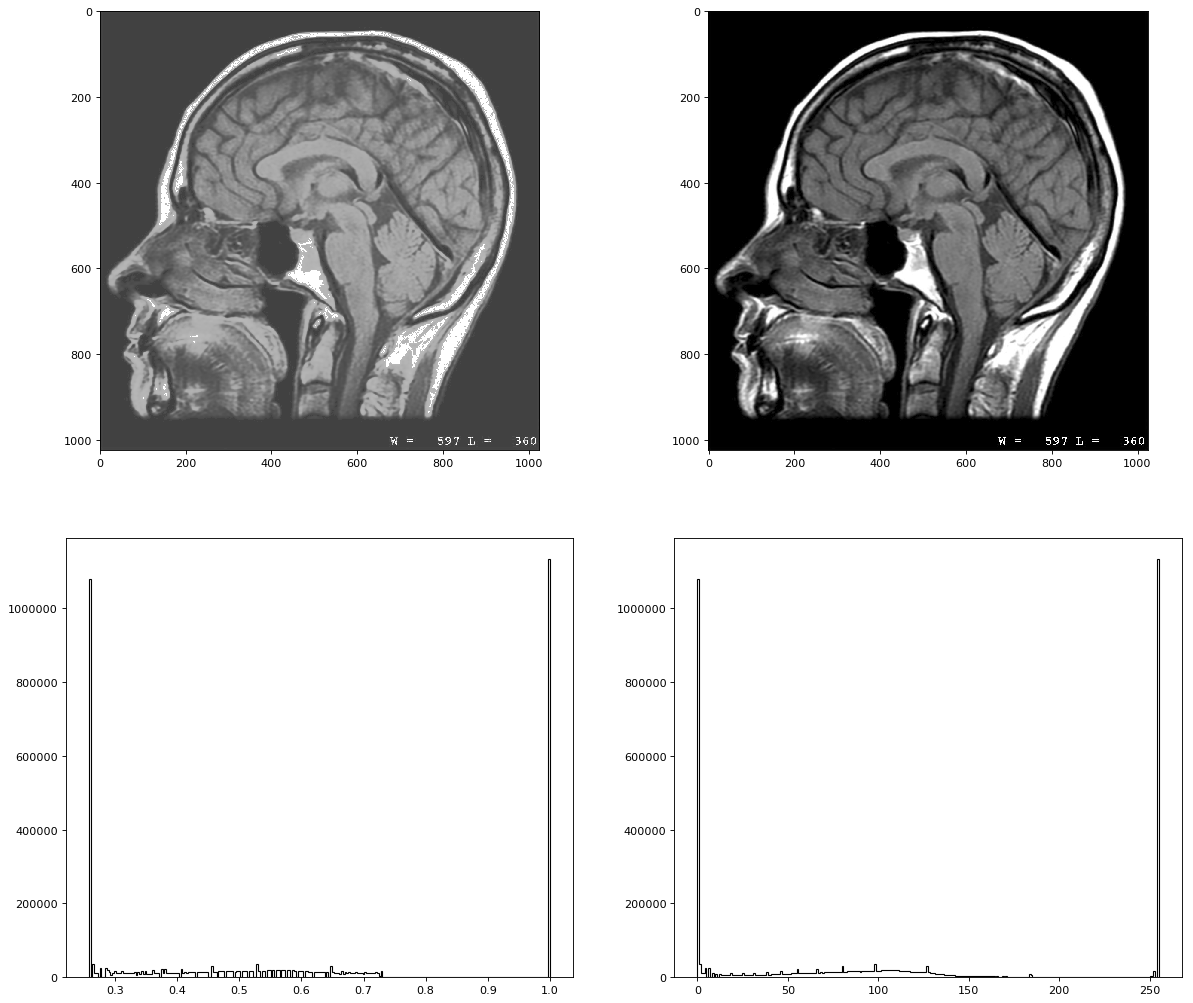

In [2]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_eq = exposure.equalize_hist(brainpicarray)
plt.subplot(221)
plt.imshow(img_eq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')


C:\Users\Lenovo\Anaconda2\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


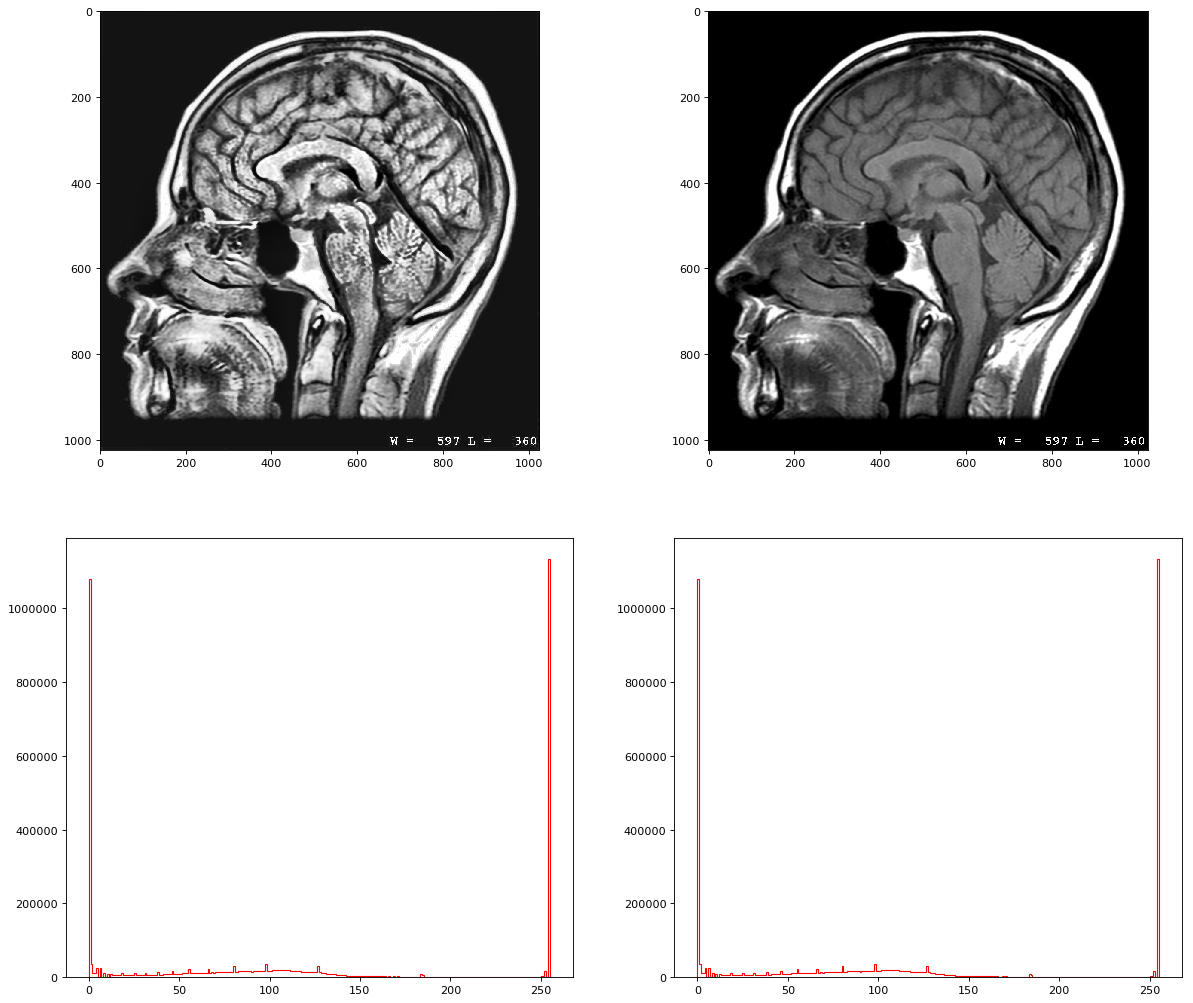

In [3]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.08)

plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')

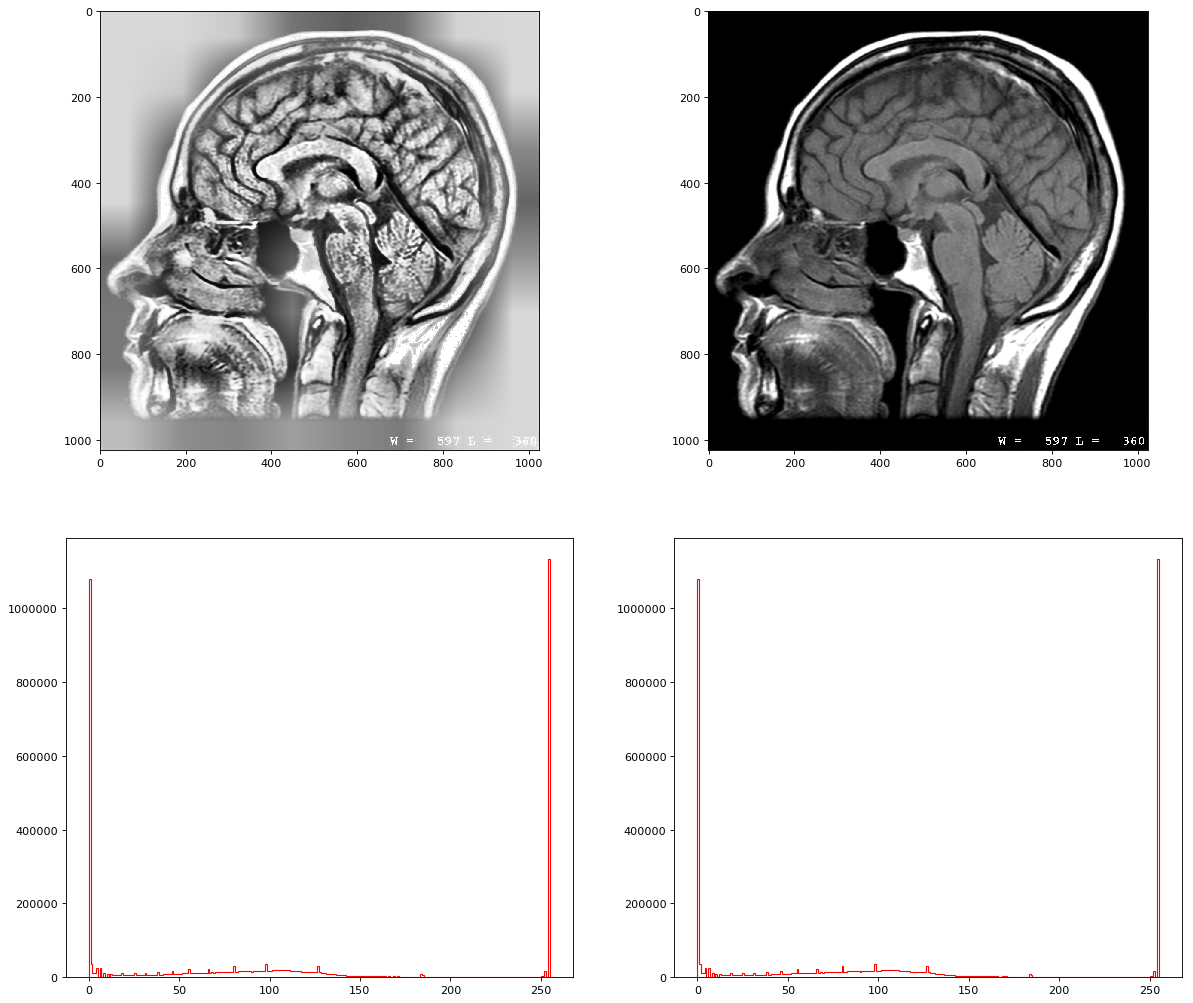

In [4]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.85)

plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')

# Cliping the limit :
The clip_limit parameter is to change the contract of the image. The value generaly lies between 0 to 1.  
At 0.85 the contrast is low whereas at 0.08 the contrast is more high. 
clip_limit : float: optional(Clipping limit, normalized between 0 and 1 (higher values give more contrast)


# Question num # 2 

Provide the syntax, parameters and a brief explanation of the function equalize hist from the Python documentation?

Syntax- skimage.exposure.equalize_hist

# Syntax description

. Return image after histogram equalization.
.skimage .exposure.equalize_hist gives 
image : array
Image array.
nbins : int, optional
Number of bins for image histogram. Note: this argument is ignored for integer images, for which each integer is its own bin.
mask: ndarray of bools or 0s and 1s, optional
Array of same shape as image. Only points at which mask == True are used for the equalization, which is applied to the whole image.
Returns:	
out : float array
Image array after histogram equalization.


Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. This strategy for the most part builds the worldwide difference of many pictures, particularly when the useable information of the picture is spoken to by close differentiation esteems. Through this modification, the powers can be better conveyed on the histogram. This takes into consideration territories of lower neighborhood difference to pick up a higher differentiation. Histogram leveling achieves this by successfully spreading out the most incessant force esteems.

# Question # 3:

Provide  the  syntax,  parameters  and  a  brief  explanation  of  the  functionequalize_adapthist from the Python documentation?


Syntax- skimage.exposure.equalize_adapthist

Contrast Limited Adaptive Histogram Equalization (CLAHE).

An algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.

This is an expansion to customary Histogram Equalization system. It improves the difference of pictures by changing the qualities in the force picture. The AHE procedure can be comprehended in 
distinctive ways. In one point of view the histogram of dim levels in the yield is maximally dark; on the off chance that it has the middle esteem in its window the yield is half dim's window around every pixel is created first. The combined conveyance of 
Dim levels, that is the aggregate entirety over the histogram, is utilized to delineate information pixel Gray level to yield dim level. In the event that a pixel has a dim level lower than all others in the encompassing window.

# Question # 4
In your own words, when would you use adaptive histogram equalization vs standard histogram equalization? Which one was more useful in the Notebook for you to notice details in the anatomy?

We use adaptive histogram when we need to limits the range of the output image so that you don't get big outliers. In essence, it clips values if they get too huge. whereas in order to improve the contrast of the image, without effecting the image structure or the information contained there in we use standard histogram equalization. As per the given notebook adaptive historam equalization as this method is very useful to clip the limit of contrast of anatomical images.

# Refrences

1) - Module: exposure¶. (n.d.). Retrieved October 31, 2017, from http://scikit-image.org/docs/dev/api/skimage.exposure.html 